## Step 0: Import important libraries

This code cell imports the necessary modules and libraries for the machine learning project.

sklearn.linear_model provides the logistic regression module, while train_test_split from sklearn.model_selection is used to split the dataset into training and testing sets. accuracy_score from sklearn.metrics is used to evaluate the performance of the models. preprocessing from sklearn is used to preprocess the data before feeding it to the learning algorithm.

numpy is imported for mathematical operations, while scipy.io is imported for reading data from files. PolynomialFeatures from sklearn.preprocessing is used to generate polynomial features from the dataset.

confusion_matrix from sklearn.metrics is used to compute confusion matrix to evaluate the performance of the model.

seaborn is imported for generating visualizations of the confusion matrix.

matplotlib.pyplot is used for generating plots of the feature weights and error.

In [435]:
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.utils import shuffle


# import math

import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Load the dataset

Load the connect-4 dataset from an .arff file and converts it to a numpy array.

connect_4_dataset is a tuple containing two elements. The first element is the data, and the second is the metadata. connect_4_dataset[0] is used to extract the data.

tolist() is used to convert the data into a list, and np.asarray from numpy is used to convert the list to a numpy array with dtype=np.float32 specified.

In [436]:
# Load the .arff file
connect_4_dataset = arff.loadarff('../connect-4.arff')

# Convert to a numpy array
data = np.asarray(connect_4_dataset[0].tolist(), dtype=np.float32)

In [437]:
# Print metadata
print(connect_4_dataset[1])

Dataset: connect-4
	a1's type is nominal, range is ('0', '1', '2')
	a2's type is nominal, range is ('0', '1', '2')
	a3's type is nominal, range is ('0', '1', '2')
	a4's type is nominal, range is ('0', '1', '2')
	a5's type is nominal, range is ('0', '1', '2')
	a6's type is nominal, range is ('0', '1', '2')
	b1's type is nominal, range is ('0', '1', '2')
	b2's type is nominal, range is ('0', '1', '2')
	b3's type is nominal, range is ('0', '1', '2')
	b4's type is nominal, range is ('0', '1', '2')
	b5's type is nominal, range is ('0', '1', '2')
	b6's type is nominal, range is ('0', '1', '2')
	c1's type is nominal, range is ('0', '1', '2')
	c2's type is nominal, range is ('0', '1', '2')
	c3's type is nominal, range is ('0', '1', '2')
	c4's type is nominal, range is ('0', '1', '2')
	c5's type is nominal, range is ('0', '1', '2')
	c6's type is nominal, range is ('0', '1', '2')
	d1's type is nominal, range is ('0', '1', '2')
	d2's type is nominal, range is ('0', '1', '2')
	d3's type is nominal

In [438]:
# Extract input features (X) and output labels (y)
X = data[:, :-1]
y = data[:, -1]

# Extract X values - 42 features
print('X:' + str(X.shape))
# Extract y values - 1 outcome
print('y:' + str(y.shape))

X:(67557, 42)
y:(67557,)


## Step 2: Splitting the dataset and adding bias

This code cell is splitting the dataset into training, validation, and testing sets while ensuring that each set has an equal number of instances from each class.

First, the input features and output labels are extracted for each class using boolean indexing.

Then, the number of instances for each class in the training, validation, and testing sets is calculated as a percentage of the smallest class.

The train_test_split() function from sklearn.model_selection is then used to split the instances of each class into their respective training, validation, and testing sets while maintaining the percentages calculated earlier.

Finally, the instances of each class in the training, validation, and testing sets are concatenated to form the final training, validation, and testing sets.

We add a column of ones to the left of the input feature matrices for the training, validation, and testing sets.

Adding a column of ones is necessary for bias term of the logistic regression model.

In [439]:
loaded = arff.loadarff('../connect-4.arff')

data = np.asarray(loaded[0].tolist(), dtype=np.float32)
X = data[:, :-1]
y = data[:, -1]

# extract the classes
X_zeros = X[y == 0]
y_zeros = y[y == 0]
X_ones = X[y == 1]
y_ones = y[y == 1]
X_twos = X[y == 2]
y_twos = y[y == 2]

max_from_each_class = min(X_zeros.shape[0], X_ones.shape[0], X_twos.shape[0])
print("max_from_each_class:", max_from_each_class)

# shuffle
np.random.seed(10)
X_zeros, y_zeros = shuffle(X_zeros, y_zeros)
X_ones, y_ones = shuffle(X_ones, y_ones)
X_twos, y_twos = shuffle(X_twos, y_twos)

# take only the first max_from_each_class elements
X_zeros = X_zeros[:max_from_each_class]
y_zeros = y_zeros[:max_from_each_class]
X_ones = X_ones[:max_from_each_class]
y_ones = y_ones[:max_from_each_class]
X_twos = X_twos[:max_from_each_class]
y_twos = y_twos[:max_from_each_class]

# split into train, test, and validation
X_zeros_train, X_zeros_testval, y_zeros_train, y_zeros_testval = train_test_split(X_zeros, y_zeros, test_size=0.2)
X_ones_train, X_ones_testval, y_ones_train, y_ones_testval = train_test_split(X_ones, y_ones, test_size=0.2)
X_twos_train, X_twos_testval, y_twos_train, y_twos_testval = train_test_split(X_twos, y_twos, test_size=0.2)
X_zeros_test, X_zeros_val, y_zeros_test, y_zeros_val = train_test_split(X_zeros_testval, y_zeros_testval, test_size=0.5)
X_ones_test, X_ones_val, y_ones_test, y_ones_val = train_test_split(X_ones_testval, y_ones_testval, test_size=0.5)
X_twos_test, X_twos_val, y_twos_test, y_twos_val = train_test_split(X_twos_testval, y_twos_testval, test_size=0.5)

# concatenate
X_train = np.concatenate((X_zeros_train[:max_from_each_class], X_ones_train[:max_from_each_class], X_twos_train[:max_from_each_class]), axis=0)
y_train = np.concatenate((y_zeros_train[:max_from_each_class], y_ones_train[:max_from_each_class], y_twos_train[:max_from_each_class]), axis=0)
X_test = np.concatenate((X_zeros_test[:max_from_each_class], X_ones_test[:max_from_each_class], X_twos_test[:max_from_each_class]), axis=0)
y_test = np.concatenate((y_zeros_test[:max_from_each_class], y_ones_test[:max_from_each_class], y_twos_test[:max_from_each_class]), axis=0)
X_val = np.concatenate((X_zeros_val[:max_from_each_class], X_ones_val[:max_from_each_class], X_twos_val[:max_from_each_class]), axis=0)
y_val = np.concatenate((y_zeros_val[:max_from_each_class], y_ones_val[:max_from_each_class], y_twos_val[:max_from_each_class]), axis=0)

# convert 2s to 0s
# X_train[X_train == 2] = 0
# X_test[X_test == 2] = 0
# X_val[X_val == 2] = 0

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

max_from_each_class: 6449
X_train: (15477, 42)
y_train: (15477,)
X_test: (1935, 42)
y_test: (1935,)
X_val: (1935, 42)
y_val: (1935,)


In [440]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))

In [441]:
# Check to make sure everything is as expected
print('X_train:' + str(X_train.shape))
print('y_train:' + str(y_train.shape))
print('X_val: \t'  + str(X_val.shape))
print('y_val: \t'  + str(y_val.shape))
print('X_test: '  + str(X_val.shape))
print('y_test: '  + str(X_val.shape))

X_train:(15477, 43)
y_train:(15477,)
X_val: 	(1935, 43)
y_val: 	(1935,)
X_test: (1935, 43)
y_test: (1935, 43)


In [442]:
# ! Class value composition in training, validation, and test set
print("y_train zeros", y_train[y_train==0].shape[0])
print("y_train ones", y_train[y_train==1].shape[0])
print("y_train twos", y_train[y_train==2].shape[0])

print("y_val zeros", y_val[y_val==0].shape[0])
print("y_val ones", y_val[y_val==1].shape[0])
print("y_val twos", y_val[y_val==2].shape[0])

print("y_test zeros", y_test[y_test==0].shape[0])
print("y_test ones", y_test[y_test==1].shape[0])
print("y_test twos", y_test[y_test==2].shape[0])

y_train zeros 5159
y_train ones 5159
y_train twos 5159
y_val zeros 645
y_val ones 645
y_val twos 645
y_test zeros 645
y_test ones 645
y_test twos 645


## Step 3: One vs Rest encoding
The original labels are '0', '1', '2'. Our Logistic Regression algorithm expects the labels to be encoded as 0 and 1.

Here, we perform one vs rest encoding using the one_vs_rest_encoding() function to convert the multiclass problem into three binary classification problems, where each problem involves classifying one of the classes as positive (+1) and the remaining classes as negative (0).

In [443]:
def one_vs_rest_encoding(y, digit = '0'):
    y_encoded = np.where(y == int(digit), 1, 0)
    return  y_encoded

In [444]:
# Perform the encoding for step 1's task
y_train_0_vs_rest = one_vs_rest_encoding(y_train, '0')
y_val_0_vs_rest =  one_vs_rest_encoding(y_val, '0')

In [445]:
print('y_train_0_vs_rest: ' + str(y_train_0_vs_rest))


y_train_0_vs_rest: [1 1 1 ... 0 0 0]


## Step 4: Train three binary classifiers and test on validation set

We are creating three binary classifiers for the multiclass classification problem using logistic regression.

We loop over each class label (0, 1, 2) and perform one-vs-rest encoding on the labels, where one class is considered as the positive class and the rest are considered as the negative class. This converts the multiclass problem into three binary classification problems.

For each binary classification problem, we generate polynomial features up to degree 3 using PolynomialFeatures() from sklearn.preprocessing. This is done to introduce non-linearity in the feature space, which can improve the accuracy of the classifier.

Then we fit a logistic regression model to the training data and the corresponding encoded labels using LogisticRegression() from sklearn.linear_model. We extract the weights of the model using logreg.coef_ and store them in a dictionary.

Next, we transform the validation data to have the same polynomial features using poly.transform(). We use the trained model to predict the labels of the validation data and compute the accuracy of the classifier using accuracy_score() from sklearn.metrics.

Finally, we store the validation accuracy of each classifier in a dictionary.

This approach makes sense because logistic regression is a popular method for binary classification. One-vs-rest encoding allows us to apply logistic regression to multiclass classification problems. Additionally, introducing non-linearity in the feature space using polynomial features can improve the accuracy of the classifier by allowing it to fit more complex decision boundaries. The validation accuracy is used to evaluate the performance of each classifier and select the best one.





In [446]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures

class CustomLogisticRegression(LogisticRegression):
    def __init__(self, *args, log_likelihoods=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.log_likelihoods = log_likelihoods or []

    def _logistic_loss_and_grad(self, w, X, y, alpha):
        # Call the original _logistic_loss_and_grad method
        loss, grad = super()._logistic_loss_and_grad(w, X, y, alpha)

        # Compute the log-likelihood
        log_likelihood = -loss
        self.log_likelihoods.append(log_likelihood)

        return loss, grad

In [447]:
lambd = 1000
feature_degree = 3
regularization = 'l2'
num_iterations = 100

In [448]:
# Create the 3 classifiers
labels = "012"
w_vals = {}
w_trains = {}
val_scores = {}
confusion_matrices = {}
train_scores = {}
for i in range(len(labels)):

    # Perform one-vs-rest for labels[i]
    y_encoded = one_vs_rest_encoding(y_train, labels[i])

    poly = PolynomialFeatures(feature_degree) # * generate all types of polynomial features up to degree d
    X_tr_poly = poly.fit_transform(X_train) # * transforms the training data to have those polynomial features
    
    
    if regularization == 'l1':
        if lambd > 0:
            logreg = LogisticRegression(penalty=regularization, C=lambd, solver='liblinear', max_iter=num_iterations)
        else:
            logreg = LogisticRegression(penalty=regularization, solver='liblinear', max_iter=num_iterations)
    else:
        if lambd > 0:
            logreg = LogisticRegression(penalty=regularization, C=lambd, max_iter=num_iterations)
        else:
            logreg = LogisticRegression(penalty=regularization, max_iter=num_iterations)                
                        
    logreg.fit(X_tr_poly, y_encoded) # ! Train
        
    w_vals[i] = logreg.coef_
    
    w_trains[i] = logreg.coef_
    
    y_predict_train = logreg.predict(X_tr_poly)
    train_scores[i] = accuracy_score(y_encoded, y_predict_train)

    X_val_poly = poly.transform(X_val) # * transforms the validation data to have those polynomial features

    y_pred_val = logreg.predict(X_val_poly)

    y_encoded_val = one_vs_rest_encoding(y_val, labels[i])

    cm = confusion_matrix(y_encoded_val, y_pred_val)

    confusion_matrices[labels[i]] = (cm, confusion_matrix(y_encoded, y_predict_train))

    # compute the accuracy of the classifier
    val_accuracy = accuracy_score(y_encoded_val, y_pred_val)

    val_scores[i] = val_accuracy

c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

## Step 5: Calculate the training set and validation set accuracy

In [449]:
for i in range(len(labels)):
     print("Validation set Model", i, "{:.2%}".format( val_scores[i]))

Validation set Model 0 71.27%
Validation set Model 1 80.00%
Validation set Model 2 83.57%


In [450]:
for i in range(len(labels)):
     print("Training set Model", i, "{:.2%}".format( train_scores[i]))

Training set Model 0 77.91%
Training set Model 1 86.56%
Training set Model 2 89.61%


In this code, we create a numpy array combined_model_evaluation_1 to store the evaluation of our model on the validation set. The array is initialized to zeros, and its length is equal to the number of examples in the validation set.

We then loop through each sample in the validation set and compute a score for each possible label using the weights of the logistic regression classifiers (w_vals). We assign the predicted label to y_predict_val based on the label with the highest score. If the prediction is correct (i.e., the predicted label matches the true label in y_val), we assign a value of 1 to combined_model_evaluation_1. If the prediction is incorrect, we assign a value of 0 to combined_model_evaluation_1.

At the end of this loop, combined_model_evaluation_1 will hold a 1 or a 0 for each sample in the validation set, depending on whether the prediction was correct or not

In [451]:
combined_model_evaluation_1 = np.zeros(len(y_train))

y_predict_train = np.zeros(len(y_train))

# Loop through each sample in the validation set and assign it a label based on the highest score. 
# Store either a 1 if the number was predicted correctly, or a 0 if the number was predicted incorrectly.
for i in range(len(X_train)):
    
    label_scores = np.zeros(len(labels))
    
    for j in range(len(labels)):
        X_train_i_2d = X_tr_poly[i].reshape(1, -1)  # Reshape X_train to a 2D array with shape (1, 43).
        label_scores[j] = X_train_i_2d @ w_trains[j].T  # Compute the score for each label.
    
    index_label_max_score = np.argmax(label_scores) # Get the index of the label with the highest score.
    y_predict_train[i] = labels[index_label_max_score]  # Assign the predicted label to `y_predict_val`.
    if int(labels[index_label_max_score]) == int(y_train[i]):  # Check if the prediction is correct.
        combined_model_evaluation_1[i] = 1  # If the prediction is correct, assign 1 to `combined_model_evaluation_1`.
    else:
        combined_model_evaluation_1[i] = 0  # If the prediction is incorrect, assign 0 to `combined_model_evaluation_1`.


In [452]:
# Print the accuracy score as a percentage
accuracy_train = np.sum(combined_model_evaluation_1) / len(y_train)
print("Final model accuracy score on train set: {:.2%}".format(accuracy_train))


Final model accuracy score on train set: 78.83%


In [453]:

combined_model_evaluation_2 = np.zeros(len(y_val))
y_predict_val = np.zeros(len(y_val))

# Loop through each sample in the validation set and assign it a label based on the highest score. 
# Store either a 1 if the number was predicted correctly, or a 0 if the number was predicted incorrectly.
for i in range(len(X_val)):
    
    label_scores = np.zeros(len(labels))
    
    for j in range(len(labels)):
        X_val_i_2d = X_val_poly[i].reshape(1, -1)  # Reshape X_val to a 2D array with shape (1, 43).
        label_scores[j] = X_val_i_2d @ w_vals[j].T  # Compute the score for each label.
    
    index_label_max_score = np.argmax(label_scores) # Get the index of the label with the highest score.
    y_predict_val[i] = labels[index_label_max_score]  # Assign the predicted label to `y_predict_val`.
    if int(labels[index_label_max_score]) == int(y_val[i]):  # Check if the prediction is correct.
        combined_model_evaluation_2[i] = 1  # If the prediction is correct, assign 1 to `combined_model_evaluation_1`.
    else:
        combined_model_evaluation_2[i] = 0  # If the prediction is incorrect, assign 0 to `combined_model_evaluation_1`.


In [454]:

# Print the accuracy score as a percentage
accuracy_val = np.sum(combined_model_evaluation_2) / len(y_val)
print("Final model accuracy score on validation set: {:.2%}".format(accuracy_val))

Final model accuracy score on validation set: 67.96%


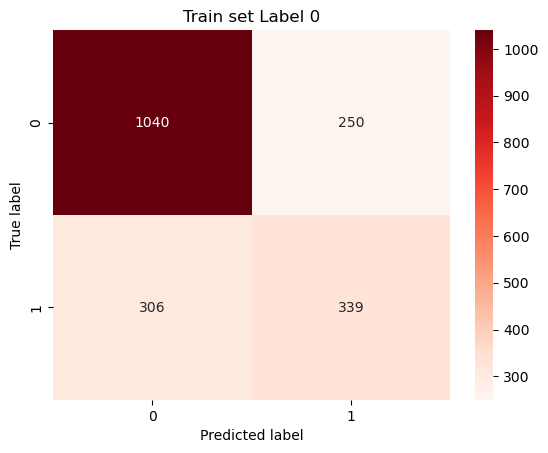

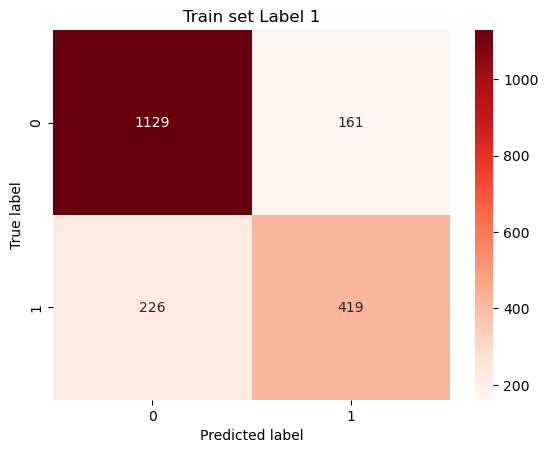

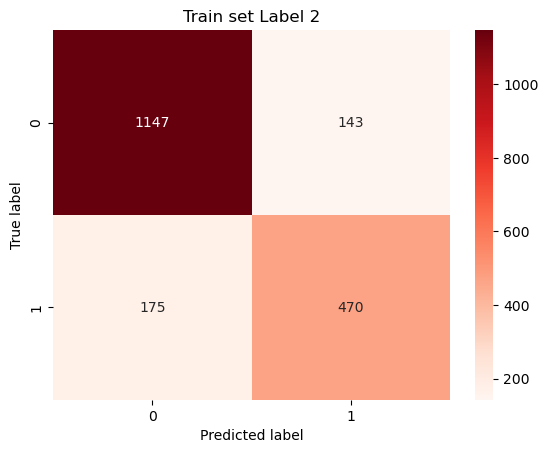

In [455]:
for i in range(len(labels)):
     # Visualize the confusion matrix
     sns.heatmap(confusion_matrices[labels[i]][0], annot=True, fmt='d', cmap='Reds')
     plt.xlabel('Predicted label')
     plt.ylabel('True label')
     plt.title("Train set Label " + str(i))
     plt.show()

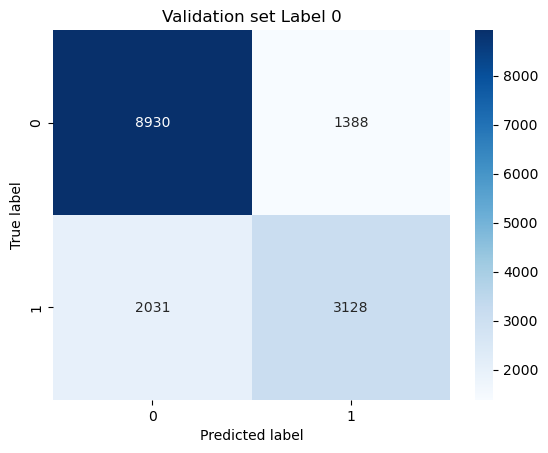

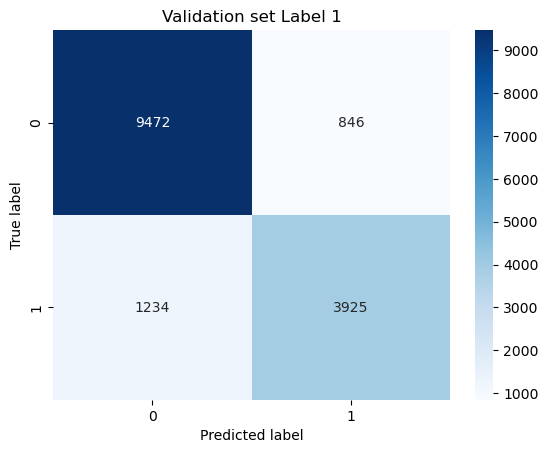

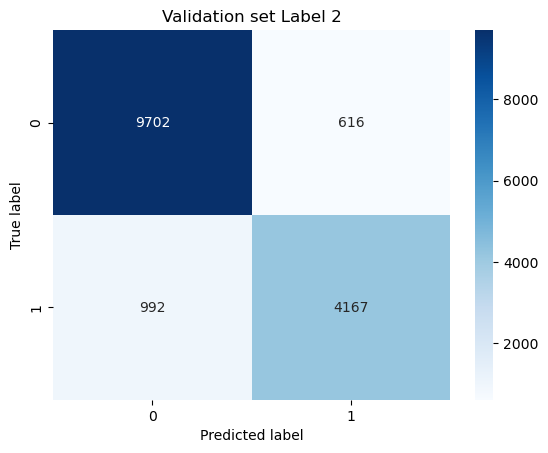

In [456]:
for i in range(len(labels)):
     # Visualize the confusion matrix
     sns.heatmap(confusion_matrices[labels[i]][1], annot=True, fmt='d', cmap='Blues')
     plt.xlabel('Predicted label')
     plt.ylabel('True label')
     plt.title("Validation set Label " + str(i))
     plt.show()

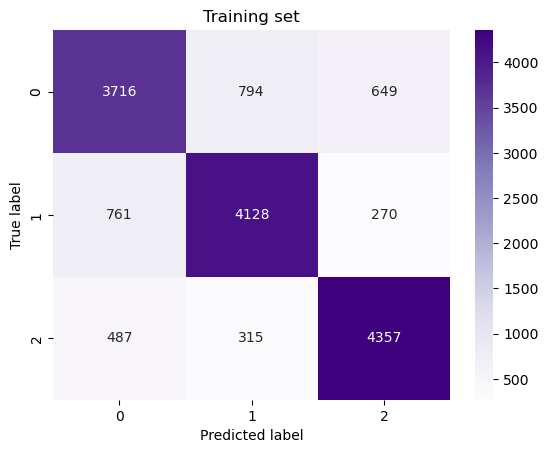

In [457]:

# Create the confusion matrix
conf_mat = confusion_matrix(y_train, y_predict_train)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Training set")
plt.show()


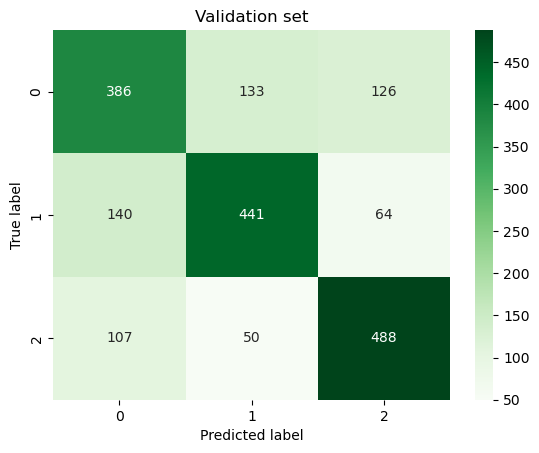

In [458]:

# Create the confusion matrix
conf_mat = confusion_matrix(y_val, y_predict_val)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Validation set")
plt.show()


In [459]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      5159
         1.0       0.79      0.80      0.79      5159
         2.0       0.83      0.84      0.84      5159

    accuracy                           0.79     15477
   macro avg       0.79      0.79      0.79     15477
weighted avg       0.79      0.79      0.79     15477



In [460]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

         0.0       0.61      0.60      0.60       645
         1.0       0.71      0.68      0.70       645
         2.0       0.72      0.76      0.74       645

    accuracy                           0.68      1935
   macro avg       0.68      0.68      0.68      1935
weighted avg       0.68      0.68      0.68      1935



# Step 6: We finetune the model and combine the validation set with the training set

In [461]:
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

In [462]:
# Check to make sure everything is as expected
print('X_train_val:' + str(X_train_val.shape))
print('y_train_val:' + str(y_train_val.shape))

X_train_val:(17412, 43)
y_train_val:(17412,)


In [463]:
# ! Class value composition in training, validation, and test set
print("y_train_val zeros", y_train_val[y_train_val==0].shape[0])
print("y_train_val ones", y_train_val[y_train_val==1].shape[0])
print("y_train_val twos", y_train_val[y_train_val==2].shape[0])


y_train_val zeros 5804
y_train_val ones 5804
y_train_val twos 5804


In [464]:
# Create the 3 classifiers
labels = "012"
w_tests = {}
test_scores = {}

confusion_matrices = {}

for i in range(len(labels)):

    # Perform one-vs-rest for labels[i]
    y_encoded = one_vs_rest_encoding(y_train_val, labels[i])

    poly = PolynomialFeatures(feature_degree) # * generate all types of polynomial features up to degree d
    X_tr_val_poly = poly.fit_transform(X_train_val) # * transforms the training data to have those polynomial features
    
    if regularization == 'l1':
        if lambd > 0:
            logreg = LogisticRegression(penalty=regularization, C=lambd, solver='liblinear', max_iter=num_iterations)
        else:
            logreg = LogisticRegression(penalty=regularization, solver='liblinear', max_iter=num_iterations)
    else:
        if lambd > 0:
            logreg = LogisticRegression(penalty=regularization, C=lambd, max_iter=num_iterations)
        else:
            logreg = LogisticRegression(penalty=regularization, max_iter=num_iterations)                
    # logreg = LogisticRegression(penalty='l2', C=1.0)
    
    logreg.fit(X_tr_val_poly, y_encoded)
    
    w_tests[i] = logreg.coef_
            
    X_test_poly = poly.transform(X_test) # * transforms the validation data to have those polynomial features

    y_pred_test = logreg.predict(X_test_poly)

    y_encoded_test = one_vs_rest_encoding(y_test, labels[i])
    
    cm = confusion_matrix(y_encoded_test, y_pred_test)

    confusion_matrices[labels[i]] = cm

    # compute the accuracy of the classifier
    test_accuracy = accuracy_score(y_encoded_test, y_pred_test)
    test_scores[i] = test_accuracy


c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gaura\.conda\envs\intro_to_ml_class\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [465]:
for i in range(len(labels)):
     print("Model", i, "{:.2%}".format(test_scores[i]))


Model 0 68.48%
Model 1 80.00%
Model 2 83.20%


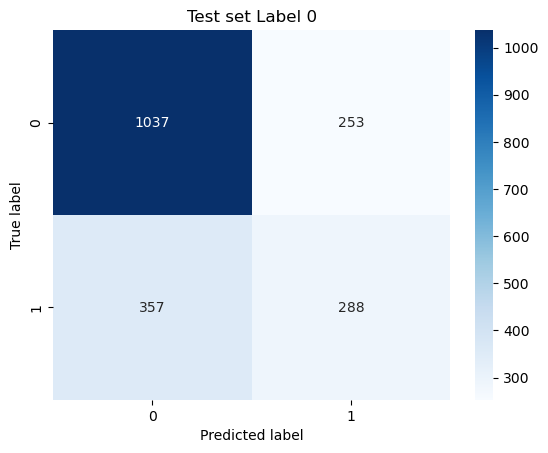

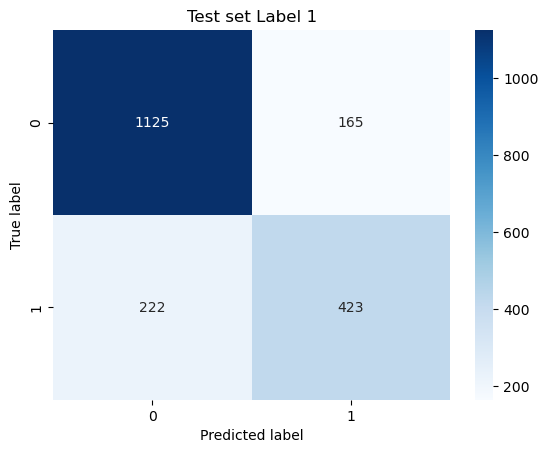

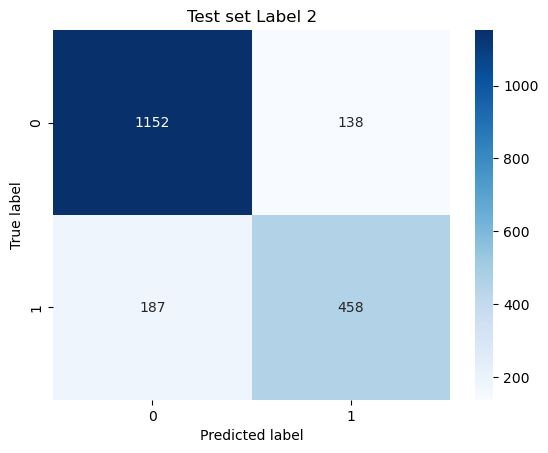

In [466]:
for i in range(len(labels)):
     # Visualize the confusion matrix
     sns.heatmap(confusion_matrices[labels[i]], annot=True, fmt='d', cmap='Blues')
     plt.xlabel('Predicted label')
     plt.ylabel('True label')
     plt.title("Test set Label " + str(i))
     plt.show()

In [467]:
# We will create a numpy array of length N, where N is the number of examples in the validation set. 
# `combined_model_evaluation_1` will hold either a 1 or a 0, depending on whether the handwritten digit was predicted correctly or not.
combined_model_evaluation_3 = np.zeros(len(y_test))

y_predict_test = np.zeros(len(y_test))

# Loop through each sample in the validation set and assign it a label based on the highest score. 
# Store either a 1 if the number was predicted correctly, or a 0 if the number was predicted incorrectly.
for i in range(len(X_test)):
    
    label_scores = np.zeros(len(labels))
    
    for j in range(len(labels)):
        X_test_i_2d = X_test_poly[i].reshape(1, -1)  # Reshape X_val to a 2D array with shape (1, 43).
        label_scores[j] = X_test_i_2d @ w_tests[j].T  # Compute the score for each label.
        
    index_label_max_score = np.argmax(label_scores) # Get the index of the label with the highest score.
    y_predict_test[i] = labels[index_label_max_score]  # Assign the predicted label to `y_predict_test`.
    if int(labels[index_label_max_score]) == int(y_test[i]):  # Check if the prediction is correct.
        combined_model_evaluation_3[i] = 1  # If the prediction is correct, assign 1 to `combined_model_evaluation_1`.
    else:
        combined_model_evaluation_3[i] = 0  # If the prediction is incorrect, assign 0 to `combined_model_evaluation_1`.


In [468]:

# Print the accuracy score as a percentage
accuracy = np.sum(combined_model_evaluation_3) / len(y_test)
print("Final model accuracy score on test set: {:.2%}".format(accuracy))

Final model accuracy score on test set: 66.82%


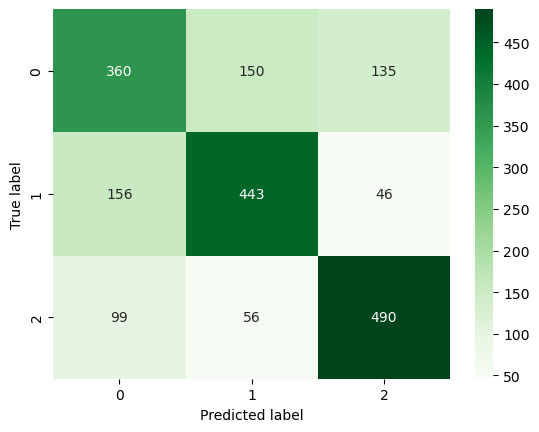

In [469]:

# Create the confusion matrix
conf_mat = confusion_matrix(y_test, y_predict_test)

# Visualize the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [470]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         0.0       0.59      0.56      0.57       645
         1.0       0.68      0.69      0.68       645
         2.0       0.73      0.76      0.74       645

    accuracy                           0.67      1935
   macro avg       0.67      0.67      0.67      1935
weighted avg       0.67      0.67      0.67      1935

